# Evaluating Simple Linear Regression
An example of evaluating our Simple Linear Regression model on some data about taxi trips

## 1. Import libraries and load data

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv("data/taxi_data.csv")

## 2. Determine if we can use Simple Linear Regression
* Data must be quantitative
* Data must have a linear relationship
* Residuals must be normally distributed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


<Axes: title={'center': 'fare vs distance traveled'}, xlabel='distance_traveled', ylabel='fare'>

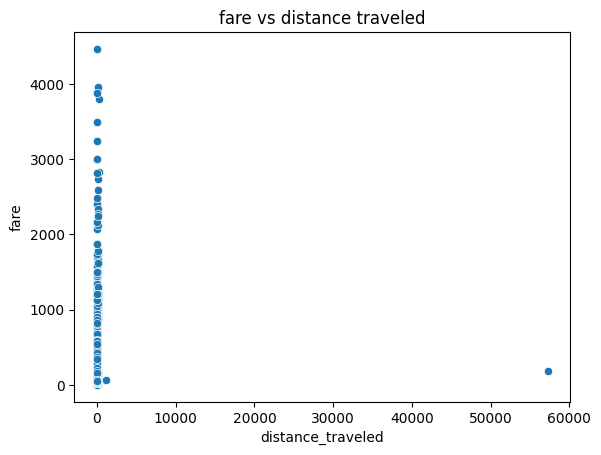

In [6]:
plt.title("fare vs distance traveled")
sns.scatterplot(data=df, x="distance_traveled", y="fare")

In [12]:
df.loc[df["distance_traveled"]==df["distance_traveled"].max()]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
34734,13755.0,315.25,1.0,3802.5,0,55.125,3857.625,0


Removed the outlier (row with 57,000 miles traveled for 187 dollars). Also removed the outlier (row with 1100 miles traveled for 61 dollars).

In [11]:
df = df.drop(df.loc[df["distance_traveled"]==df["distance_traveled"].max()].index)

<Axes: title={'center': 'fare vs distance traveled'}, xlabel='distance_traveled', ylabel='fare'>

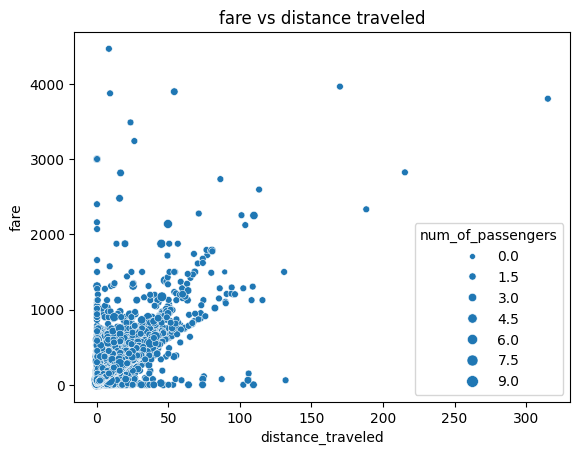

In [34]:
plt.title("fare vs distance traveled")
sns.scatterplot(data=df, x="distance_traveled", y="fare", size="num_of_passengers")

## 3. Create the Model

In [19]:
# Extract data
X_train = df[["distance_traveled"]]
y_train = df["fare"]

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[14.11940761] 32.19101424810921


## 4. Plot the Line of Best Fit

In [20]:
y_pred = model.predict(X_train)

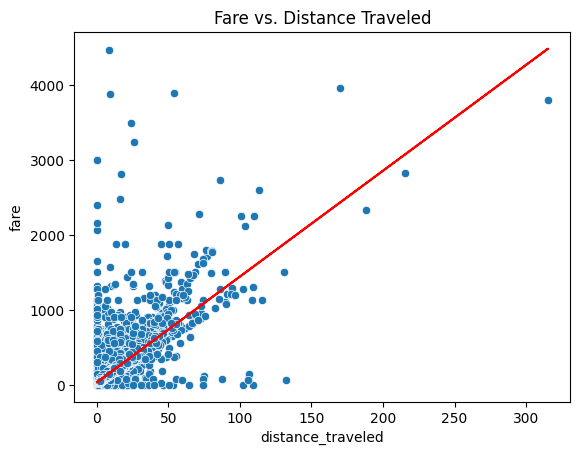

In [21]:
plt.title("Fare vs. Distance Traveled")
sns.scatterplot(data=df, x="distance_traveled", y="fare")
plt.plot(X_train, y_pred, color="r")

## 5. Check the Distribution of Residuals

In [23]:
# Calculate the residuals
residuals = y_train - y_pred

<Axes: ylabel='Count'>

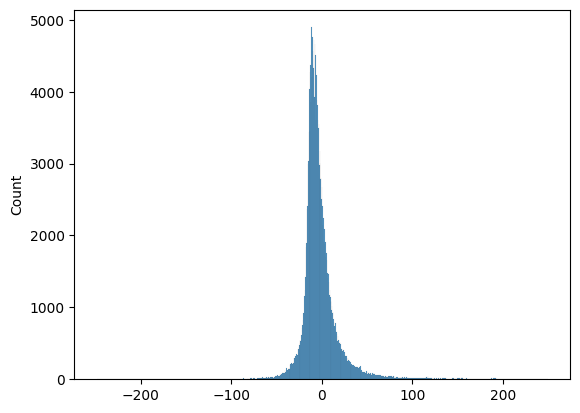

In [29]:
# Graph the residuals
clipped_residuals = [r for r in residuals if r > -250 and r < 250]
sns.histplot(clipped_residuals)

<Axes: title={'center': 'Residuals vs. Distance Traveled'}, xlabel='distance_traveled', ylabel='fare'>

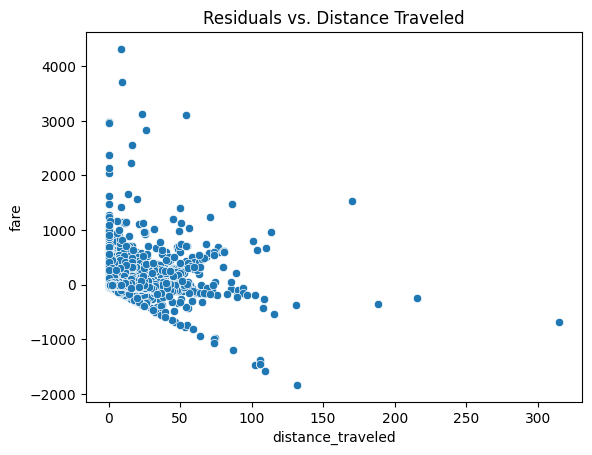

In [30]:
plt.title("Residuals vs. Distance Traveled")
sns.scatterplot(data=X_train, x="distance_traveled", y=residuals)

## 6. Evaluate our Model

In [32]:
# Calculate R-squared
model.score(X_train, y_train)

0.6965004131309875

In [49]:
# Extract data
X_train = df[["distance_traveled", "num_of_passengers", "trip_duration"]]
y_train = df["fare"]

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[1.40331111e+01 4.64096460e-01 6.62250688e-04] 31.226223993158186


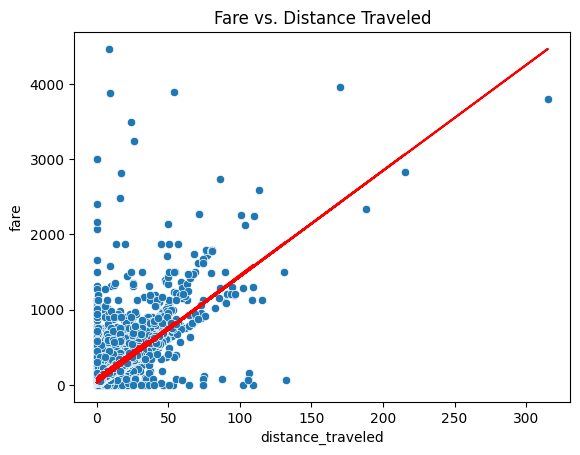

In [50]:
y_pred = model.predict(X_train)
plt.title("Fare vs. Distance Traveled")
sns.scatterplot(data=df, x="distance_traveled", y="fare")
plt.plot(X_train["distance_traveled"], y_pred, color="r")